# Ice shelf buttressing
**Description:** 

Choose between downloading the minimum, maximum or along flow buttressing grids, or the
ice viscosity grid. 

**Datasets:** 

Durand, G., Gillet-Chaulet, F., Gagliardini, O. & Fürst, J. J. (2016). SUMER Antarctic Ice-shelf Buttressing. (NSIDC-0664, Version 1). [Data Set]. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. https://doi.org/10.5067/FWHORAYVZCE7. [describe subset used if applicable]. Date Accessed 02-04-2025.

**Associated papers:** 

Fürst, Johannes Jakob, Gaël Durand, Fabien Gillet-Chaulet, Laure Tavard, Melanie Rankl, Matthias Braun, and Olivier Gagliardini. “The Safety Band of Antarctic Ice Shelves.” Nature Climate Change 6, no. 5 (May 2016): 479–82. https://doi.org/10.1038/nclimate2912.




In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import os

from polartoolkit import fetch, maps, regions, utils

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

In [4]:
variables = ["max", "min", "flow", "viscosity"]

grids = []
for v in variables:
    data = fetch.buttressing(
        version=v,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {v}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for max
grid spacing: 1000.0 m
grid region: (-2750000.0, 2750000.0, -2750000.0, 2750000.0)
grid zmin: -781.639465332
grid zmax: 717.836303711
grid registration: g
##########
Info for min
grid spacing: 1000.0 m
grid region: (-2750000.0, 2750000.0, -2750000.0, 2750000.0)
grid zmin: -1537.85681152
grid zmax: 83.4083175659
grid registration: g
##########
Info for flow
grid spacing: 1000.0 m
grid region: (-2750000.0, 2750000.0, -2750000.0, 2750000.0)
grid zmin: -1433.67492676
grid zmax: 102.327476501
grid registration: g
##########
Info for viscosity
grid spacing: 1000.0 m
grid region: (-2750000.0, 2750000.0, -2750000.0, 2750000.0)
grid zmin: 6.90586421115e-06
grid zmax: 384.891693115
grid registration: g
##########


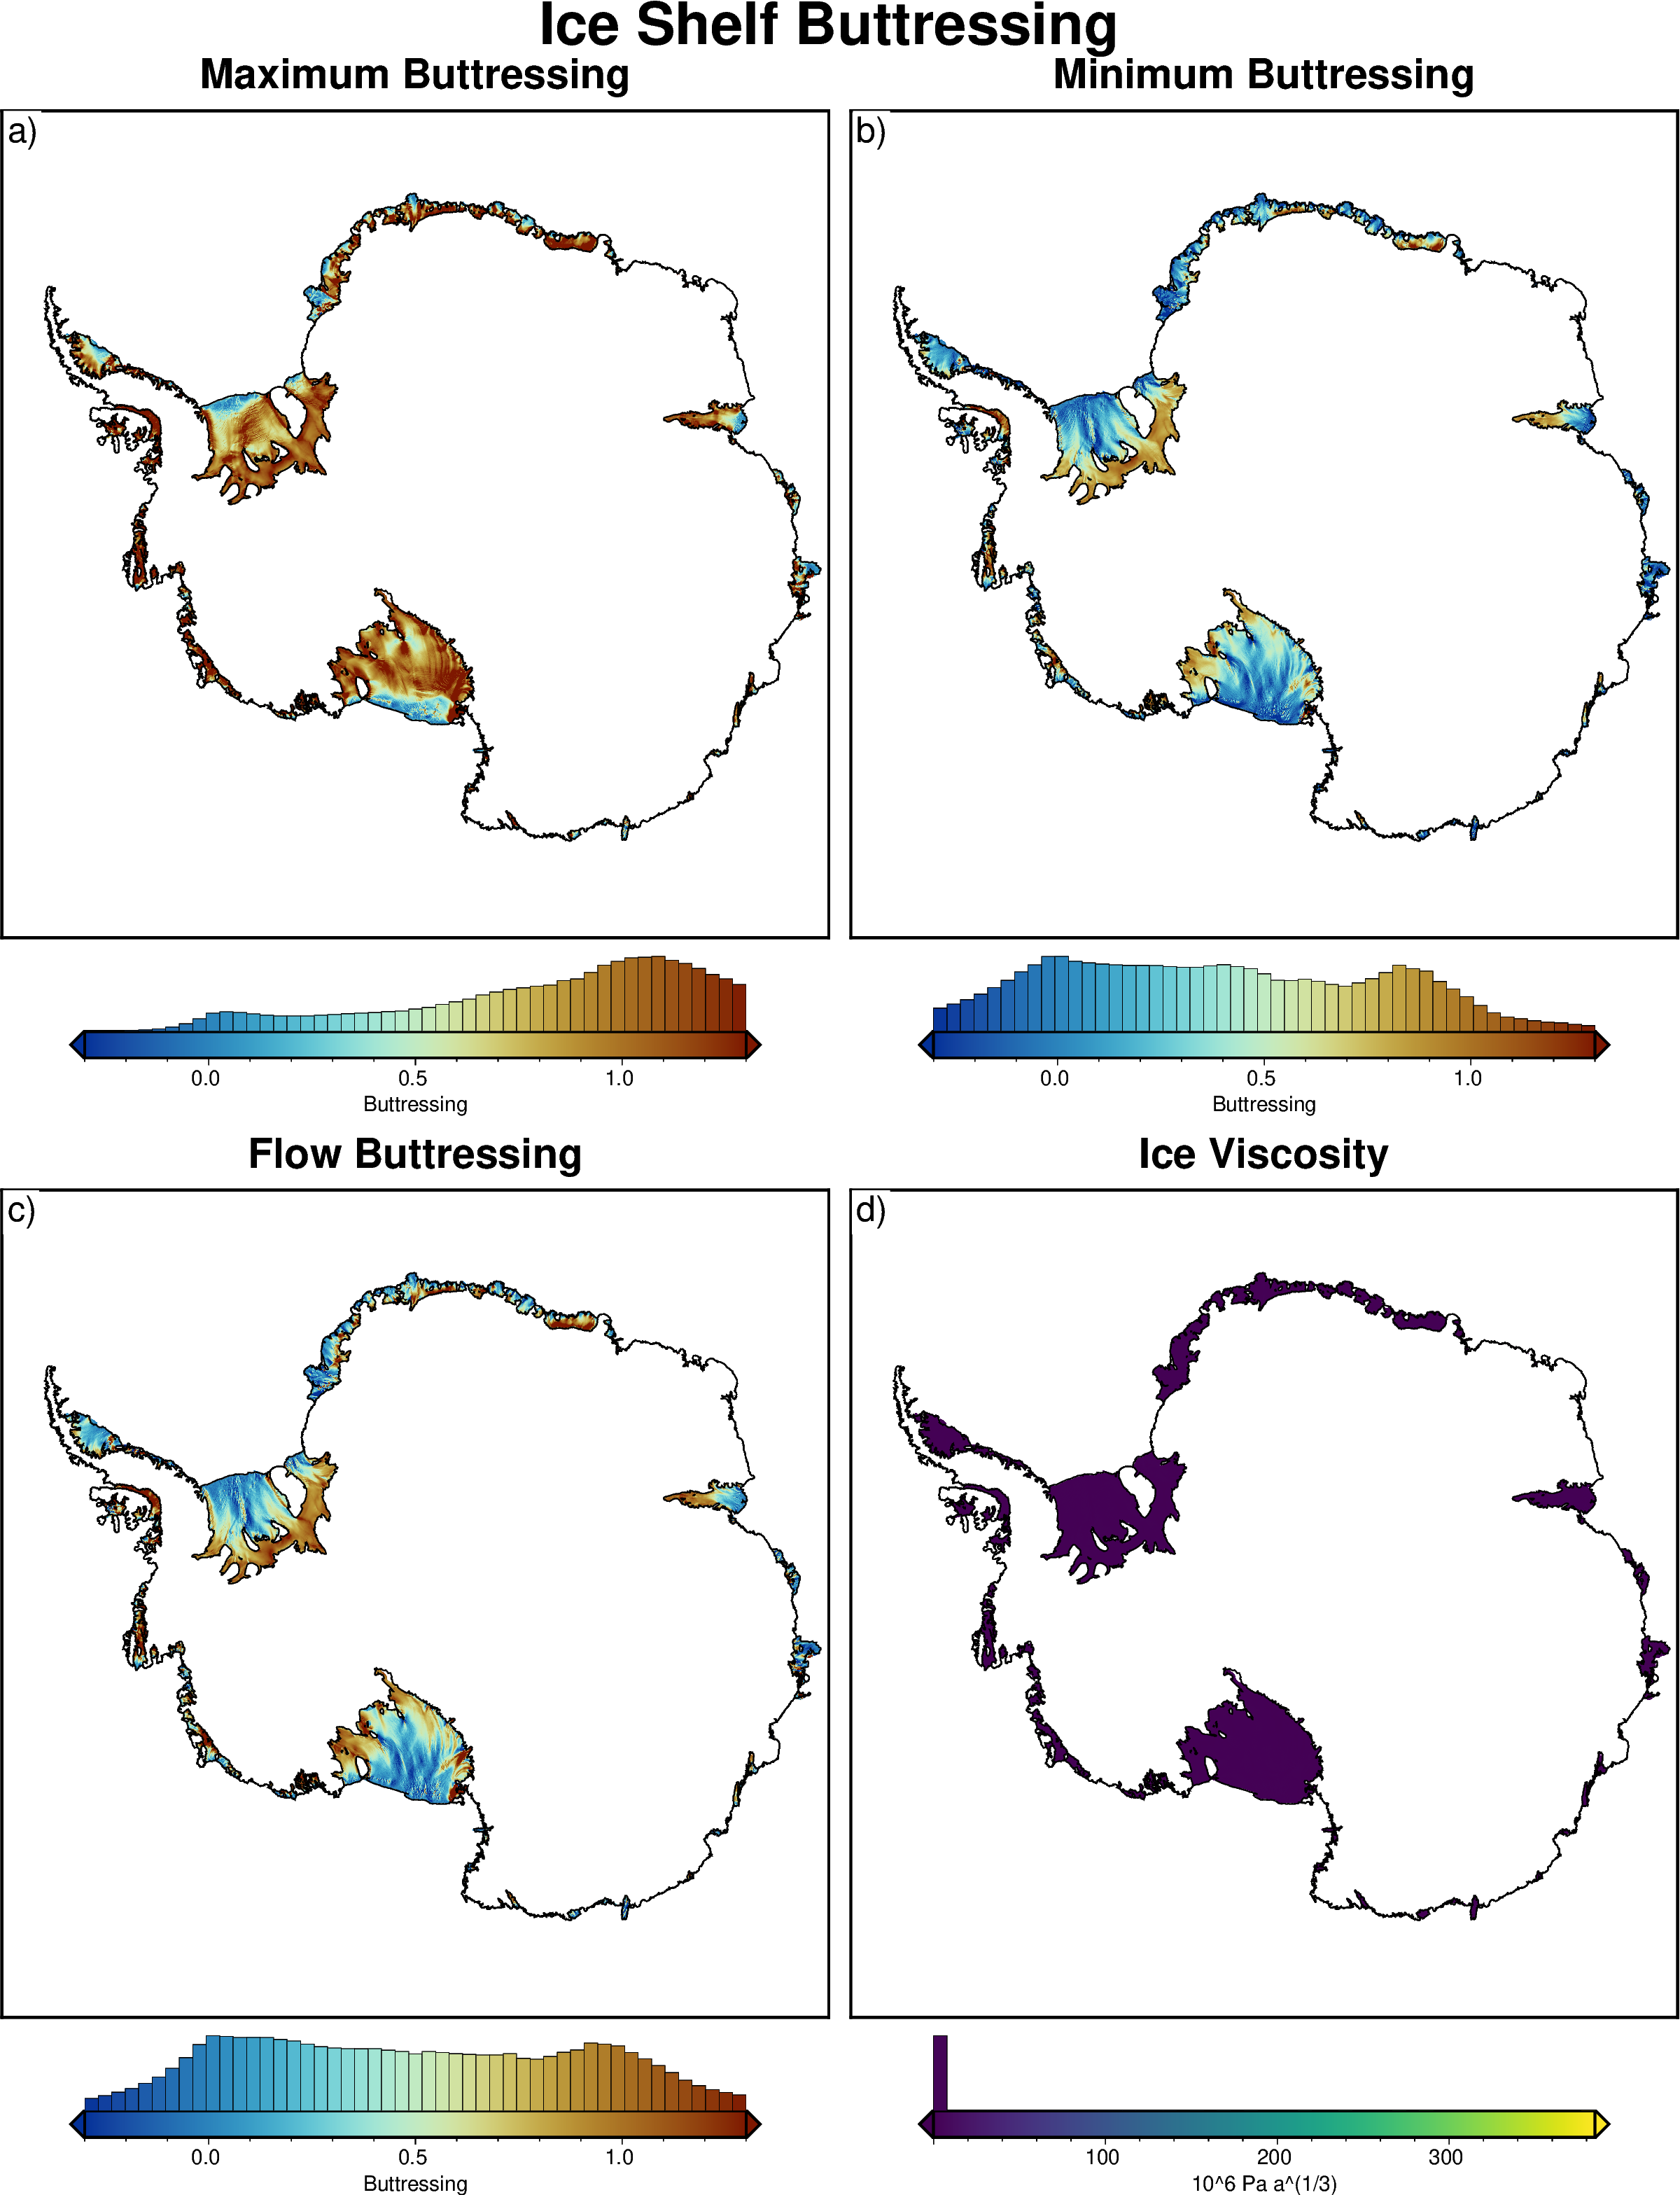

In [6]:
fig = maps.subplots(
    grids,
    region=regions.antarctica,
    fig_title="Ice Shelf Buttressing",
    titles=[
        "Maximum Buttressing",
        "Minimum Buttressing",
        "Flow Buttressing",
        "Ice Viscosity",
    ],
    cpt_limits=[(-0.3, 1.3)] * 3 + [None],
    cbar_labels=["Buttressing"] * 3 + ["10^6 Pa a^(1/3)"],
    margins=".5c/1.3c",
    coast=True,
    reverse_cpts=[True] * 3 + [False],
    cmaps=["roma"] * 3 + ["viridis"],
    hist=True,
)
fig.show(dpi=200)